In [4]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Funciones de soporte
# -----------------------------------------------------------------------

from src import soporte as sp

In [5]:
# cargamos el dataframe correspondiente a Customer Flight Analysis.csv
df_vuelos = pd.read_csv("archivos/Customer-Flight-Activity.csv") # De momento mantengo Loyalty Number como columna 🚨
df_vuelos = df_vuelos.sort_values(by=['Loyalty Number', 'Year', 'Month'], ascending=[True, True, True]).reset_index(drop=True)
display(df_vuelos.head())
display(df_vuelos.tail())
display(df_vuelos.sample(5))

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100018,2017,2,2,2,4,1320,132.0,0,0
2,100018,2017,3,14,3,17,2533,253.0,438,36
3,100018,2017,4,4,0,4,924,92.0,0,0
4,100018,2017,5,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999986,2018,8,8,1,9,3672,367.0,655,53
405620,999986,2018,9,0,0,0,0,0.0,0,0
405621,999986,2018,10,6,0,6,708,70.0,0,0
405622,999986,2018,11,11,4,15,2040,204.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
372812,927026,2017,11,5,0,5,1830,183.0,0,0
103562,330870,2017,3,0,0,0,0,0.0,0,0
119537,367492,2018,6,10,6,16,4704,470.0,473,38
98545,320183,2017,2,0,0,0,0,0.0,0,0
161246,459163,2018,3,13,0,13,1963,245.0,0,0


In [6]:
# cargamos el dataframe correspondiente a Customer-Loyalty-History.csv
df_clientes = pd.read_csv("archivos/Customer-Loyalty-History.csv") # De momento mantengo Loyalty Number como columna 🚨
df_clientes = df_clientes.sort_values(by='Loyalty Number', ascending=True).reset_index(drop=True)
display(df_clientes.head())
display(df_clientes.tail())
display(df_clientes.sample(5))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,999902,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
16733,999911,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
16734,999940,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
16735,999982,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
16736,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4308,332276,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,49654.0,Married,Nova,5360.56,Standard,2017,3,NaN,NaN
553,130077,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,76652.0,Married,Aurora,15956.52,Standard,2013,1,NaN,NaN
10364,656027,Canada,Ontario,Toronto,M2Z 4K1,Male,Doctor,258786.0,Married,Nova,4550.86,2018 Promotion,2018,3,NaN,NaN
1550,184207,Canada,British Columbia,Vancouver,V1E 4R6,Female,College,NaN,Married,Aurora,7857.30,Standard,2013,5,2014.0,2.0
11211,702161,Canada,British Columbia,Vancouver,V5R 1W3,Male,High School or Below,44112.0,Divorced,Nova,12624.96,Standard,2018,5,NaN,NaN


# Fase 1: Exploración y Limpieza ✨

# EXPLORACION Y LIMPIEZA BASICA

# Dimensiones df

In [7]:
#Analizamos las dimensiones de los dos dataframes

print(f'Num. filas df_vuelos: {df_vuelos.shape[0]}')
print(f'Num. columnas df_vuelos: {df_vuelos.shape[1]}')
print(f"\n---------------\n")
print(f'Num. filas df_clientes: {df_clientes.shape[0]}')
print(f'Num. columnas df_clientes: {df_clientes.shape[1]}')

Num. filas df_vuelos: 405624
Num. columnas df_vuelos: 10

---------------

Num. filas df_clientes: 16737
Num. columnas df_clientes: 16


# Nombres columnas

In [8]:
# Nombres de las columnas 
print(f'Nombres columnas df_vuelos: {df_vuelos.columns}')
print(f"\n---------------\n")
print(f'Nombres columnas df_clientes: {df_clientes.columns}')

Nombres columnas df_vuelos: Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

---------------

Nombres columnas df_clientes: Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


# Informacion df

In [9]:
# Informacion general de los df
print(f'Informacion df_vuelos: {df_vuelos.info()}')
print(f"\n---------------\n")
print(f'Informacion df_clientes: {df_clientes.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
Informacion df_vuelos: None

---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data col

No tenemos variables categoricas en df_vuelos ✨

# % Nulos

In [10]:
nulos_vuelos = df_vuelos.isnull().sum()
nulos_clientes = df_clientes.isnull().sum()

# % Nulos
print(f'% Nulos df_vuelos: {(nulos_vuelos/df_vuelos.shape[0]*100).round(2)}')
print(f"\n---------------\n")
print(f'% Nulos df_clientes: {(nulos_clientes/df_clientes.shape[0]*100).round(2)}')

% Nulos df_vuelos: Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

---------------

% Nulos df_clientes: Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64


- No tenemos valores nulos en df_vuelos ✨
- SI tenemos valores nulos en df_clientes 🚩 -> PDTE
    - Salary                25.32
    - Cancellation Year     87.65
    - Cancellation Month    87.65

# Duplicados 

In [11]:
print(f'Los duplicados que tenemos en df_vuelos: {df_vuelos.duplicated().sum()}')
print(f"\n---------------\n")
print(f'Los duplicados que tenemos en df_clientes: {df_clientes.duplicated().sum()}')

Los duplicados que tenemos en df_vuelos: 1864

---------------

Los duplicados que tenemos en df_clientes: 0


- No tenemos duplicados en df_clientes ✨
- SI tenemos duplicados en df_vuelos 🚩

# Limpieza duplicados df_vuelos

In [12]:
# Se que los duplicados estan en df_vuelos, verifico si solo estan duplicados una vez -> con keep=False cuenta todas las filas (originales y duplicadas)
df_vuelos.duplicated(keep=False).sum()

3712

In [13]:
# comprobamos duplicados en df_vuelos
df_vuelos[df_vuelos.duplicated(keep=False)].sort_values('Loyalty Number').head(15)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
1006,101902,2017,12,0,0,0,0,0.0,0,0
1007,101902,2017,12,0,0,0,0,0.0,0,0
996,101902,2017,7,0,0,0,0,0.0,0,0
997,101902,2017,7,0,0,0,0,0.0,0,0
984,101902,2017,1,0,0,0,0,0.0,0,0
985,101902,2017,1,0,0,0,0,0.0,0,0
986,101902,2017,2,0,0,0,0,0.0,0,0
987,101902,2017,2,0,0,0,0,0.0,0,0
988,101902,2017,3,0,0,0,0,0.0,0,0
989,101902,2017,3,0,0,0,0,0.0,0,0


In [14]:
# Eliminaremos duplicados unicamente cuando todas las columnas sean idénticas, ya que para un mismo Loyalty Number nos muestra diferentes valores como el año en el cual se registraron las actividades de vuelo y el mes del año en el cual ocurrieron dichas actividades.
df_vuelos = df_vuelos.drop_duplicates()


In [15]:
#Analizamos las dimensiones de df_vuelos una vez eliminados los duplicados de filas exactas

print(f'Num. filas df_vuelos: {df_vuelos.shape[0]}')
print(f'Num. columnas df_vuelos: {df_vuelos.shape[1]}')
print(f"\n---------------\n")
print(f'Informacion df_vuelos: {df_vuelos.info()}')
print(f"\n---------------\n")
print(f'Los duplicados que tenemos en df_vuelos: {df_vuelos.duplicated().sum()}')

Num. filas df_vuelos: 403760
Num. columnas df_vuelos: 10

---------------

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB
Informacion df_vuelos: None

---------------

Los duplicados

Se han eliminado un total de 1864 filas que contenian valores identicos, manteniendo las originales 

# Valores negativos?
- Lo comprobamos para df_vuelos teniendo en cuenta que todas sus columnas contienen valores numericos
- Lo comprobamos para las columnas con valores numericos de df_clientes

In [16]:
# df_vuelos
filas_negativas_df_vuelos = df_vuelos[(df_vuelos < 0).any(axis=1)]
display(filas_negativas_df_vuelos)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


No tenemos valores negativos en df_vuelos ✨

In [17]:
# df_clientes
# Obtenemos lista con las columnas numericas
columnas_numericas_clientes = df_clientes.select_dtypes(include='number').columns.tolist()
print(columnas_numericas_clientes)
print(f"\n---------------\n")
# Compruebo si hay valores negativos en estas columnas
negativos_por_columna = (df_clientes[columnas_numericas_clientes] < 0).any()
print(negativos_por_columna)
print(f"\n---------------\n")
# La columna Salary tiene valores negativos, compruebo cuales son:
df_filas_negativas_salary = df_clientes[df_clientes['Salary'] < 0]
display(df_filas_negativas_salary['Salary'])


['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

---------------

Loyalty Number        False
Salary                 True
CLV                   False
Enrollment Year       False
Enrollment Month      False
Cancellation Year     False
Cancellation Month    False
dtype: bool

---------------



288     -10605.0
952     -58486.0
1728    -31911.0
2094    -49001.0
2445    -46683.0
2570    -47310.0
4575    -39503.0
4888    -26322.0
4925     -9081.0
6120    -17534.0
6235    -46470.0
7277    -43234.0
7894    -45962.0
8227    -49830.0
9350    -19325.0
11737   -19332.0
11830   -46303.0
12893   -34079.0
15010   -57297.0
16007   -12497.0
Name: Salary, dtype: float64

In [18]:
print(f'Num filas en df_clientes que tienen valores negativos en Salary: {df_filas_negativas_salary.shape[0]}')


Num filas en df_clientes que tienen valores negativos en Salary: 20


Tenemos 20 valores negativos en la columna Salary de df_clientes 🚩 

# Limpieza valores negativos df_clientes

In [19]:
print(f'El % de valores negativos en df_salary es: {round((df_filas_negativas_salary.shape[0]/df_clientes.shape[0])*100,2)}')

El % de valores negativos en df_salary es: 0.12


El % de valores negativos es MUY BAJO -> 0.12 % -> hacemos la suposicion de que han sido errores al introducir lo valores, ya que son pocos y tienen valores coherentes, por lo que lo pasaremos a numero positivos

In [20]:
df_clientes['Salary'] = df_clientes['Salary'].abs()

In [21]:
# Compruebo si hay valores negativos para Salary
negativos_salary = (df_clientes["Salary"] < 0).any()
print(negativos_salary)

False


# Principales estadisticos df_vuelos

In [22]:
# principales estadisticos de df_vuelos
display(df_vuelos.describe().T)
# NOTA: no tenemos variables categoricas en df_vuelos

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


# Principales estadisticos df_clientes

In [23]:
# principales estadisticos de df_vuelos
display(df_clientes.describe().T.round(2))
print(f"\n---------------\n")
display(df_clientes.describe(include = "object").T)

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.88,258912.13,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79359.34,34749.69,9081.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.96,3.46,1.00,4.00,7.00,10.00,12.00



---------------



,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


# Valores unicos de las variables categoricas de df_clientes

In [24]:
# creamos una lista con los nombres de las columnas categoricas 
columnas_cat_clientes = df_clientes.select_dtypes(include='object').columns.tolist()
print(columnas_cat_clientes)
# empezamos a iterar por cada una de las columnas para sacar sus valores únicos y sus frecuencias
for columna in columnas_cat_clientes:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_clientes[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_clientes[columna].value_counts()} ")

['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    16737
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec' 'Manitoba'
 'Newfoundland' 'New Brunswick' 'Nova Scotia' 'Prince Edward Island'
 'Yukon']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int6

Las frecuencias de los valores únicos de las categorías son: Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64 


No se observa ningun valor atipico en las variables categoricas de df_clientes ✨

Country tiene un unico valor y podria eliminarse ya que tenemos la columna city, province o postal code, pero vamos a conservarla por si entraran nuevos datos con paises diferentes 

# GESTION DE NULOS 

Como tenemos unicamente nulos en df_clientes y estos no tienen relacion con los valores de df_vuelos vamos a realizar la gestion de nulos antes de la union de los dataframes

In [25]:
print(f'% Nulos df_clientes: {(nulos_clientes/df_clientes.shape[0]*100).round(2)}')

% Nulos df_clientes: Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64


GESTION DE NULOS EN SALARY

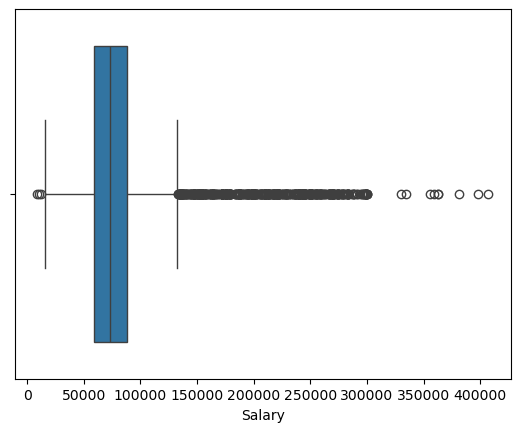

In [26]:
# Analizamos la distribucion de los datos de salary
sns.boxplot(x= "Salary", data = df_clientes);

- Representan un 25% del total y presentan valores atipicos, por lo que utilizaremos los metodos IterativeImputer y KNNImputer 

In [27]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df_clientes.copy()
df_copia.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


Metodo IterativeImputer ✨

Utiliza un enfoque iterativo de imputación mediante regresión múltiple. Para cada variable con valores faltantes, estima esos valores faltantes usando regresiones iterativas con las demás variables

In [28]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[92552.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [47670.        ],
       [79359.34090727],
       [46594.        ]])

In [29]:
# Añadimos una columna nueva con los datos obtenidos
df_copia[["Salary_iterative"]] = imputer_iterative_imputado.round(2)
display(df_copia.head())
# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[["Salary_iterative"]].isnull().sum()} nulos")

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,92552.00
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,79359.34
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,79359.34
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,63253.00
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,91163.00


Después del 'Iterative' tenemos: 
Salary_iterative    0
dtype: int64 nulos


Se observa que se han observado los valores nulos por 79359.34, que es el valor de la media 79359.34 -> valores atipicos indican que quizas no sea la mejor opcion

Metodo KNNImputer ✨

Basado en el algoritmo de K-Nearest Neighbors (KNN), este imputador rellena los valores faltantes usando la media o mediana de los valores de las muestras más cercanas (vecinos más próximos).

NOTA 🚨 No se ha podido aplicar este metodo ya que se rompe el kernel, por lo que nos basaremos unicamente en los valores obtenido con el metodo IterativeImputer

Resolucion gestion nulos en Salary ✨

Como hemos mencionado anteriormente, el metodo IterativeImputer nos ha sustituido los valores nulos por la media. Sin embargo, se ha podido observar que Salary tiene valores atipicos (outliers), por que finalmente se decide sustitur los valores nulos por la mediana

In [30]:
# Calculamos la mediana de la columna 'Salary' (ignorando valores nulos)
mediana_salary = df_clientes['Salary'].median()

# Reemplazamos los valores nulos en 'Salary' con la mediana
df_clientes['Salary'] = df_clientes['Salary'].fillna(mediana_salary)

# Comprobamos que no hay valores nulos en la columna Salary
nulos_clientes = df_clientes.isnull().sum()
print(f'% Nulos df_clientes: {(nulos_clientes/df_clientes.shape[0]*100).round(2)}')

% Nulos df_clientes: Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                 0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64


GESTION DE NULOS EN Cancellation Year y Cancellation Month

- Mantenemos estos nulos ya que las columnas indican el año y el mes en los que el cliente canceló su membresía en el programa de lealtad, por lo que puede ser que no lo haya cancelado y por eso es nulo.

- Se observa ademas que el % de nulos es igual para ambos casos, lo que tiene sentido ya que si no hay un registro de cancelacion mensual, tampoco lo habra anual


# UNION

In [31]:
#Analizamos las dimensiones de los dos dataframes

print(f'Num. filas df_vuelos: {df_vuelos.shape[0]}')
print(f'Num. columnas df_vuelos: {df_vuelos.shape[1]}')
print(f"\n---------------\n")
print(f'Num. filas df_clientes: {df_clientes.shape[0]}')
print(f'Num. columnas df_clientes: {df_clientes.shape[1]}')

Num. filas df_vuelos: 403760
Num. columnas df_vuelos: 10

---------------

Num. filas df_clientes: 16737
Num. columnas df_clientes: 16


Unificaremos los dataframes utilizando la columna en comun Loyalty Number y como queremos mantener todos los valores de ambos df utilizaremos outer join -> Este tipo de unión asegura que todos los registros de ambos DataFrames estén presentes en el resultado, rellenando con valores nulos para las columnas que no coincidan

In [32]:
## Comprobación forma outer merge: 
df_union = df_vuelos.merge(df_clientes, how='outer', on='Loyalty Number')
print(f'Num. filas df_vuelos: {df_union.shape[0]}')
print(f'Num. columnas df_vuelos: {df_union.shape[1]}')

Num. filas df_vuelos: 403760
Num. columnas df_vuelos: 25


In [ ]:
display(df_union.head(10))


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
5,100018,2017,6,4,1,5,4330,433.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
6,100018,2017,7,10,0,10,3870,387.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
7,100018,2017,8,10,5,15,4200,420.0,690,56,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
8,100018,2017,9,9,4,13,1651,165.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
9,100018,2017,10,6,0,6,1032,103.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [34]:
print(f'Los duplicados que tenemos en df_union: {df_union.duplicated().sum()}')

Los duplicados que tenemos en df_union: 0


In [35]:
nulos_union = df_union.isnull().sum()

# % Nulos
print(f'% Nulos df_union: {(nulos_union/df_union.shape[0]*100).round(2)}')


% Nulos df_union: Loyalty Number                  0.0
Year                            0.0
Month                           0.0
Flights Booked                  0.0
Flights with Companions         0.0
Total Flights                   0.0
Distance                        0.0
Points Accumulated              0.0
Points Redeemed                 0.0
Dollar Cost Points Redeemed     0.0
Country                         0.0
Province                        0.0
City                            0.0
Postal Code                     0.0
Gender                          0.0
Education                       0.0
Salary                          0.0
Marital Status                  0.0
Loyalty Card                    0.0
CLV                             0.0
Enrollment Type                 0.0
Enrollment Year                 0.0
Enrollment Month                0.0
Cancellation Year              87.7
Cancellation Month             87.7
dtype: float64


Reemplazamos espacios por guiones bajos y pasamos a minuscula para homogeneizar

In [36]:
df_union = sp.minus_guion_bajo(df_union)
display(df_union.head())

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [37]:
df_union.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [38]:
df_union.shape

(403760, 25)

Guardamos DF final en CSV: 

In [39]:
# index=False es útil si solo quieres los datos y no necesitas la columna de índice.
df_union.to_csv("archivos/df_union.csv", index=False)